In [81]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')
import hvplot.pandas

import yfinance as yf
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime


In [82]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('api.env')

True

In [83]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [84]:
# use this cell to get the risk level from the questionary
# for now I'm using mid as default

risk = "high"

In [100]:
SPDR_sectors = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]








In [85]:
# Set the tickers for both the bond and stock portion of the portfolio
if risk == "high":
    tickers = ["XLK", "XLY", "IWM", "TMF", "TYD"]
    
elif risk == "mid":
    tickers = ["QQQ", "SPY", "DIA", "TLT", "IEF"]
    
elif risk == "low":
    tickers = ["SPLV", "NOBL", "VTV", "SHY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-04", tz="America/New_York").isoformat()

In [96]:

# calculate the betas of all the Xl sectors and use that to determine low, mid, or high risk
# put them into the righ spots and add cryptos
# variance and covariance
# make it into a class


In [99]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-01-02 05:00:00+00:00,153.20,153.9700,152.4600,153.87,20489647,81444,153.401426,IWM
2018-01-03 05:00:00+00:00,153.87,154.4600,153.5199,154.09,21836626,76614,154.028284,IWM
2018-01-04 05:00:00+00:00,154.97,155.1500,154.0200,154.43,14087303,70004,154.510259,IWM
2018-01-05 05:00:00+00:00,154.89,154.9800,153.9400,154.80,19984046,89250,154.525225,IWM
2018-01-08 05:00:00+00:00,154.73,155.2700,153.5000,155.05,18457323,68337,154.716537,IWM
...,...,...,...,...,...,...,...,...
2023-04-28 04:00:00+00:00,146.79,148.0609,145.4150,147.86,3691034,57745,147.097681,XLY
2023-05-01 04:00:00+00:00,147.50,147.8200,146.1900,146.40,4273877,47655,146.909069,XLY
2023-05-02 04:00:00+00:00,146.18,146.8700,144.7700,146.55,4608577,59457,146.006500,XLY


In [ ]:
# Reorganize the DataFrame
# Separate ticker data
#SPDR_sectors = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]

XLC = ticker_data[ticker_data['symbol']=='XLC'].drop('symbol', axis=1)
XLY = ticker_data[ticker_data['symbol']=='XLY'].drop('symbol', axis=1)
XLP = ticker_data[ticker_data['symbol']=='XLP'].drop('symbol', axis=1)
XLE = ticker_data[ticker_data['symbol']=='XLE'].drop('symbol', axis=1)
TYD = ticker_data[ticker_data['symbol']=='TYD'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
ticker_data = pd.concat([XLC, XLY, XLP, XLE, TYD],axis=1, keys=['XLC','XLY', 'XLP', 'XLE', 'TYD'])

XLC_close = ticker_data["XLC"].filter(['close'])
XLY_close = ticker_data["XLY"].filter(['close'])
XLP_close = ticker_data["XLP"].filter(['close'])
XLE_close = ticker_data["XLE"].filter(['close'])
TYD_close = ticker_data["TYD"].filter(['close'])

close_data = pd.concat([XLC_close, XLY_close, XLP_close, XLE_close, TYD_close],axis=1, keys=['XLC','XLY', 'XLP', 'XLE', 'TYD'])

In [88]:

if risk == "high":
    # Reorganize the DataFrame
    # Separate ticker data
    TQQQ = ticker_data[ticker_data['symbol']=='XLK'].drop('symbol', axis=1)
    SPXL = ticker_data[ticker_data['symbol']=='XLY'].drop('symbol', axis=1)
    UDOW = ticker_data[ticker_data['symbol']=='IWM'].drop('symbol', axis=1)
    TMF = ticker_data[ticker_data['symbol']=='TMF'].drop('symbol', axis=1)
    TYD = ticker_data[ticker_data['symbol']=='TYD'].drop('symbol', axis=1)

    # Concatenate the ticker DataFrames
    ticker_data = pd.concat([TQQQ, SPXL, UDOW, TMF, TYD],axis=1, keys=['XLK','XLY', 'IWM', 'TMF', 'TYD'])
    
    TQQQ_close = ticker_data["XLK"].filter(['close'])
    SPXL_close = ticker_data["XLY"].filter(['close'])
    UDOW_close = ticker_data["IWM"].filter(['close'])
    TMF_close = ticker_data["TMF"].filter(['close'])
    TYD_close = ticker_data["TYD"].filter(['close'])

    close_data = pd.concat([TQQQ_close, SPXL_close, UDOW_close, TMF_close, TYD_close],axis=1, keys=['XLK','XLY', 'IWM', 'TMF', 'TYD'])
    
if risk == "mid":
    QQQ = ticker_data[ticker_data['symbol']=='QQQ'].drop('symbol', axis=1)
    SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)
    DIA = ticker_data[ticker_data['symbol']=='DIA'].drop('symbol', axis=1)
    TLT = ticker_data[ticker_data['symbol']=='TLT'].drop('symbol', axis=1)
    IEF = ticker_data[ticker_data['symbol']=='IEF'].drop('symbol', axis=1)

    # Concatenate the ticker DataFrames
    ticker_data = pd.concat([QQQ, SPY, DIA, TLT, IEF],axis=1, keys=['QQQ','SPY', 'DIA', 'TLT', 'IEF'])
    
    
    QQQ_close = ticker_data["QQQ"].filter(['close'])
    SPY_close = ticker_data["SPY"].filter(['close'])
    DIA_close = ticker_data["DIA"].filter(['close'])
    TLT_close = ticker_data["TLT"].filter(['close'])
    IEF_close = ticker_data["IEF"].filter(['close'])

    close_data = pd.concat([QQQ_close, SPY_close, DIA_close, TLT_close, IEF_close],axis=1, keys=['QQQ','SPY', 'DIA', 'TLT', 'IEF'])
    
if risk == "low":
    SPLV = ticker_data[ticker_data['symbol']=='SPLV'].drop('symbol', axis=1)
    NOBL = ticker_data[ticker_data['symbol']=='NOBL'].drop('symbol', axis=1)
    VTV = ticker_data[ticker_data['symbol']=='VTV'].drop('symbol', axis=1)
    SHY = ticker_data[ticker_data['symbol']=='SHY'].drop('symbol', axis=1)
    AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)

    # Concatenate the ticker DataFrames
    ticker_data = pd.concat([SPLV, NOBL, VTV, SHY, AGG],axis=1, keys=['SPLV','NOBL', 'VTV', 'SHY', 'AGG'])

    # Create a new dataframe with only the close values

    SPLV_close = ticker_data["SPLV"].filter(['close'])
    NOBL_close = ticker_data["NOBL"].filter(['close'])
    VTV_close = ticker_data["VTV"].filter(['close'])
    SHY_close = ticker_data["SHY"].filter(['close'])
    AGG_close = ticker_data["AGG"].filter(['close'])

    close_data = pd.concat([SPLV_close, NOBL_close, VTV_close, SHY_close, AGG_close],axis=1, keys=['SPLV','NOBL', 'VTV', 'SHY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
display(close_data.head())
display(close_data.tail())
#ticker_data

,XLK,XLY,IWM,TMF,TYD
,close,close,close,close,close
timestamp,,,,,
2018-01-02 05:00:00+00:00,64.74,100.16,153.87,21.38,43.6100
2018-01-03 05:00:00+00:00,65.27,100.65,154.09,21.64,43.9600
2018-01-04 05:00:00+00:00,65.61,100.98,154.43,21.67,43.5700
2018-01-05 05:00:00+00:00,66.30,101.78,154.80,21.50,43.5325
2018-01-08 05:00:00+00:00,66.55,101.90,155.05,21.44,43.2908


,XLK,XLY,IWM,TMF,TYD
,close,close,close,close,close
timestamp,,,,,
2023-04-28 04:00:00+00:00,150.83,147.86,175.20,8.85,32.58
2023-05-01 04:00:00+00:00,150.92,146.40,175.30,8.10,31.31
2023-05-02 04:00:00+00:00,149.51,146.55,171.70,8.66,32.64
2023-05-03 04:00:00+00:00,148.25,145.39,172.33,8.82,33.28
2023-05-04 04:00:00+00:00,147.54,144.27,170.40,8.59,33.22


<AxesSubplot:xlabel='timestamp'>

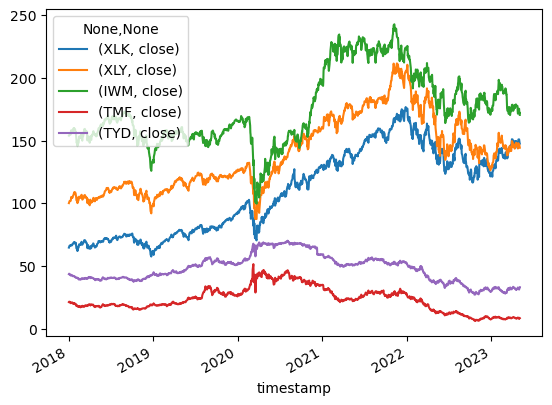

In [89]:
close_data.plot.line()

In [90]:
# Use the hvplot to plot the close for each ticker
if risk == "high":
    MC_simulation = MCSimulation(
        portfolio_data=close_data,
        weights=[0.20, 0.20, 0.20, 0.20, 0.20],
        num_simulation=500,
        num_trading_days=252*10,
    )

if risk == "mid":
    MC_simulation = MCSimulation(
        portfolio_data=close_data,
        weights=[0.30, 0.25, 0.25, 0.10, 0.10],
        num_simulation=500,
        num_trading_days=252*10,
    )

if risk == "low":
    MC_simulation = MCSimulation(
        portfolio_data=close_data,
        weights=[0.30, 0.15, 0.15, 0.20, 0.20],
        num_simulation=500,
        num_trading_days=252*10,
    )

# Review the simulation input data
MC_simulation.portfolio_data.head()

XLK                  XLY                  IWM  \
                           close daily_return   close daily_return   close   
timestamp                                                                    
2018-01-02 05:00:00+00:00  64.74          NaN  100.16          NaN  153.87   
2018-01-03 05:00:00+00:00  65.27     0.008187  100.65     0.004892  154.09   
2018-01-04 05:00:00+00:00  65.61     0.005209  100.98     0.003279  154.43   
2018-01-05 05:00:00+00:00  66.30     0.010517  101.78     0.007922  154.80   
2018-01-08 05:00:00+00:00  66.55     0.003771  101.90     0.001179  155.05   

                                          TMF                   TYD  \
                          daily_return  close daily_return    close   
timestamp                                                             
2018-01-02 05:00:00+00:00          NaN  21.38          NaN  43.6100   
2018-01-03 05:00:00+00:00     0.001430  21.64     0.012161  43.9600   
2018-01-04 05:00:00+00:00     0.002207  21.67     0.001386  43.5700   
2018-01-05 05:00:00+00:00     0.002396  21.50    -0.007845  43.5325   
2018-01-08 05:00:00+00:00     0.001615  21.44    -0.002791  43.2908   

                                        
                          daily_return  
timestamp                               
2018-01-02 05:00:00+00:00          NaN  
2018-01-03 05:00:00+00:00     0.008026  
2018-01-04 05:00:00+00:00    -0.008872  
2018-01-05 05:00:00+00:00    -0.000861  
2018-01-08 05:00:00+00:00    -0.005552

In [91]:
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992111,1.004793,1.006483,0.999932,0.978741,1.002827,1.000542,1.011566,1.008688,1.016870,...,1.009254,0.985637,0.987705,0.990723,0.992338,0.987146,0.993653,1.008862,1.017061,0.994450
2,0.999686,0.997553,1.001006,1.005409,0.961310,1.008444,0.995248,1.023177,1.011225,1.022318,...,1.004004,0.990952,0.984255,0.991754,0.996242,0.996451,0.985944,1.006508,1.005393,0.986928
3,0.990910,0.992555,1.002258,1.009080,0.961018,0.991074,1.004041,1.033478,0.993258,1.021639,...,1.009222,1.000782,0.990979,0.988643,0.984212,0.992549,0.985808,1.017363,1.005492,0.977650
4,0.988984,1.003261,1.001391,1.015907,0.977172,0.995762,1.016712,1.041957,1.000794,1.018540,...,0.999582,1.014342,0.997278,0.980990,0.980075,0.998092,0.999857,1.020766,1.031151,0.980229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.080068,2.103389,1.229623,0.747571,1.568505,0.896370,1.450648,0.660852,0.866444,0.999470,...,0.915650,1.488494,0.848906,1.090420,0.706214,3.222937,3.433744,2.490116,1.489316,1.433025
2517,1.071259,2.138739,1.232888,0.745174,1.564473,0.907325,1.454527,0.662880,0.867712,0.999744,...,0.906766,1.504293,0.856222,1.092542,0.702190,3.260877,3.482934,2.491083,1.492559,1.438526
2518,1.051908,2.161061,1.220229,0.730801,1.581626,0.906498,1.437161,0.670241,0.867471,1.019681,...,0.918178,1.520707,0.852822,1.089724,0.710461,3.261326,3.503813,2.509761,1.490961,1.430798
2519,1.058126,2.131681,1.241137,0.733795,1.594877,0.888208,1.441762,0.674939,0.875192,1.015190,...,0.924540,1.549547,0.851043,1.093143,0.695991,3.278965,3.524690,2.558577,1.492691,1.428626


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

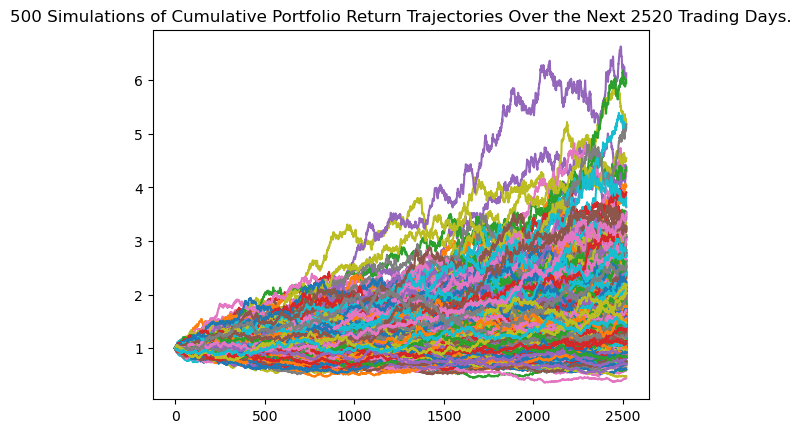

In [92]:
MC_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

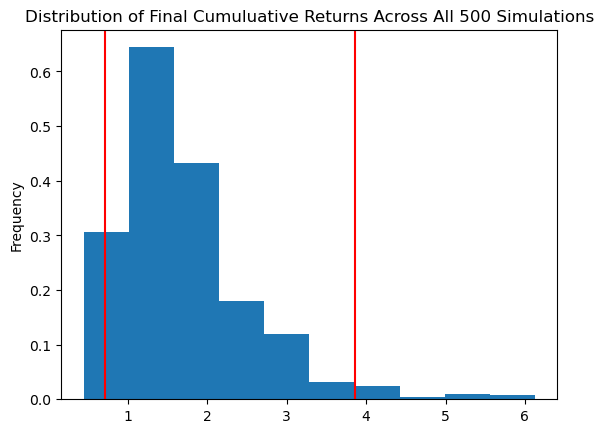

In [93]:
MC_simulation.plot_distribution()

In [94]:
tbl = MC_simulation.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(tbl)

count           500.000000
mean              1.711281
std               0.834863
min               0.443332
25%               1.122470
50%               1.534284
75%               2.056564
max               6.125102
95% CI Lower      0.707704
95% CI Upper      3.861988
Name: 2520, dtype: float64
